In [ ]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data/dogs-vs-cats-vvsmall.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
base_dir = '//content/dogs-vs-cats-vvsmall'

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')

train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')

validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

['cat.238.jpg', 'cat.2576.jpg', 'cat.2472.jpg', 'cat.1698.jpg', 'cat.2571.jpg', 'cat.834.jpg', 'cat.1330.jpg', 'cat.2429.jpg', 'cat.92.jpg', 'cat.84.jpg']
['dog.298.jpg', 'dog.960.jpg', 'dog.701.jpg', 'dog.954.jpg', 'dog.2379.jpg', 'dog.396.jpg', 'dog.1046.jpg', 'dog.1272.jpg', 'dog.2606.jpg', 'dog.212.jpg']
['cat.9067.jpg', 'cat.9137.jpg', 'cat.8879.jpg', 'cat.9289.jpg', 'cat.8919.jpg', 'cat.8713.jpg', 'cat.8954.jpg', 'cat.9331.jpg', 'cat.9047.jpg', 'cat.9275.jpg']
['dog.8711.jpg', 'dog.8871.jpg', 'dog.9341.jpg', 'dog.9151.jpg', 'dog.8955.jpg', 'dog.8564.jpg', 'dog.9022.jpg', 'dog.8616.jpg', 'dog.8649.jpg', 'dog.8665.jpg']


In [ ]:
# print out the number of images in the directories
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))

total training cat images: 3000
total training dog images: 3000
total validation cat images: 900
total validation dog images: 900


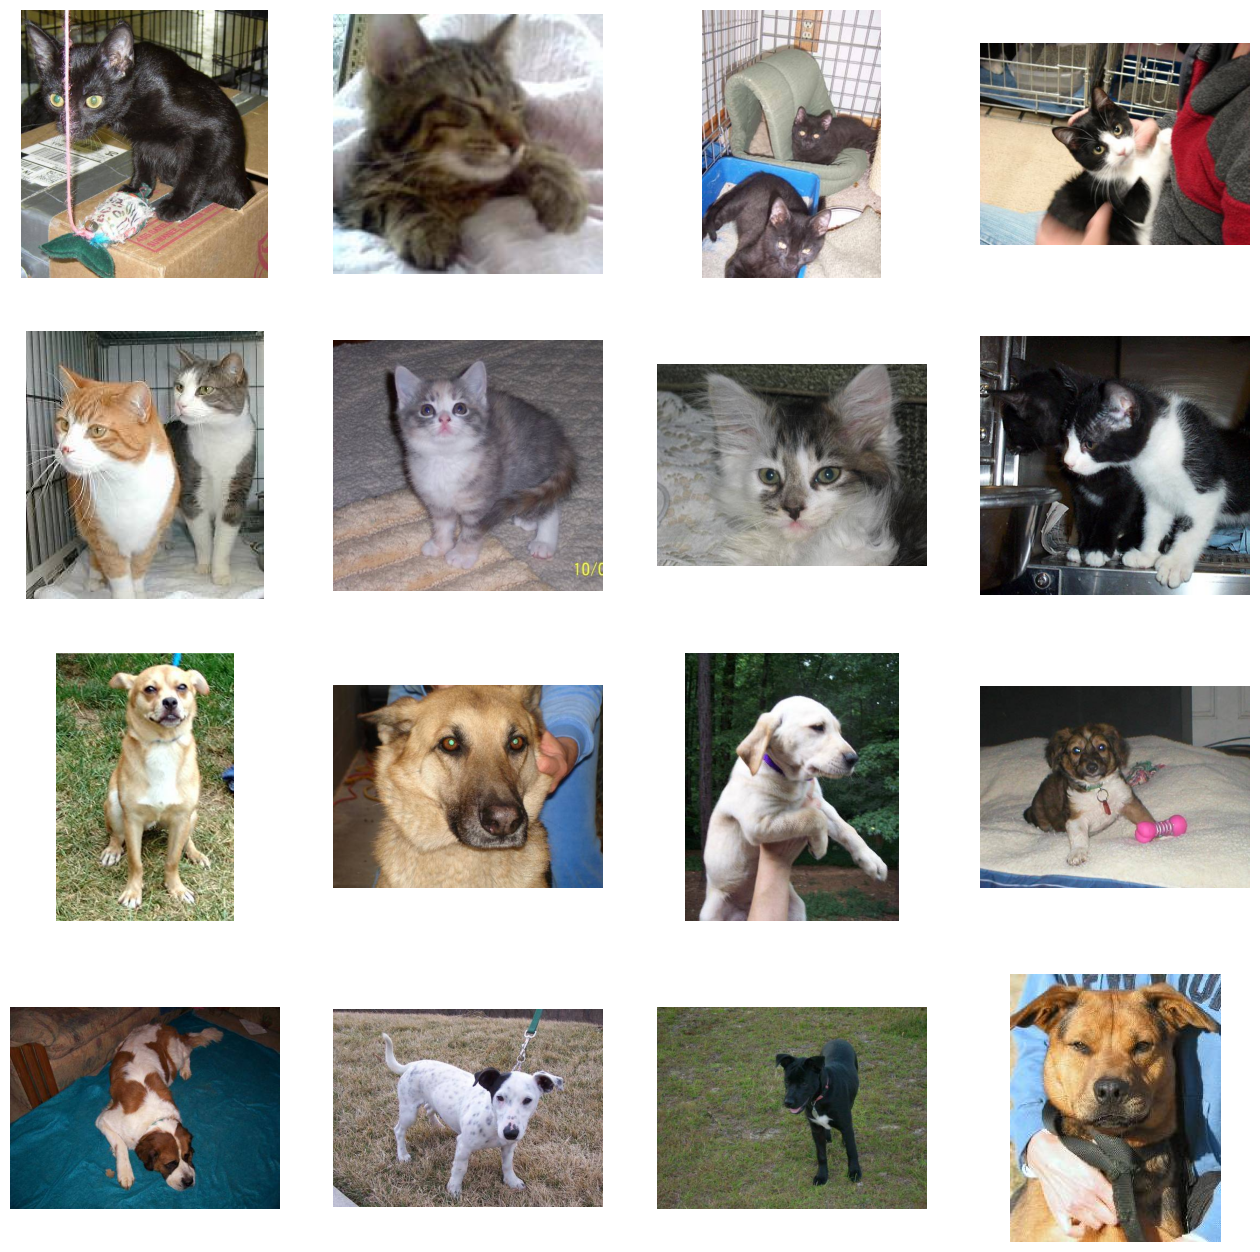

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_cat_pix = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]

# pick the first 8 human pictures
next_dog_pix = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
      '/content/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16, ResNet50

keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(100)

# Load the VGG16 model without the top (fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

# Create a Sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Add additional layers on top of VGG16
# model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization (Batch  (None, 1000)              4000      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 25641713 (97.82 MB)
Trainable params: 25586593 (97.61 MB)
Non-trainable params: 55120 (215.31 KB)
__________

In [ ]:
history=model.fit( train_generator,
                    validation_data = validation_generator,
                    epochs=10
                  )

Epoch 1/15
188/188 [==============================] - 70s 373ms/step - loss: 0.0247 - accuracy: 0.9940 - val_loss: 0.0809 - val_accuracy: 0.9767
Epoch 2/15
188/188 [==============================] - 70s 371ms/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.1187 - val_accuracy: 0.9633
Epoch 3/15
188/188 [==============================] - 70s 371ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0807 - val_accuracy: 0.9772
Epoch 4/15
188/188 [==============================] - 74s 395ms/step - loss: 0.0160 - accuracy: 0.9962 - val_loss: 0.1197 - val_accuracy: 0.9683
Epoch 5/15
188/188 [==============================] - 70s 371ms/step - loss: 0.0136 - accuracy: 0.9977 - val_loss: 0.1012 - val_accuracy: 0.9694
Epoch 6/15
188/188 [==============================] - 70s 370ms/step - loss: 0.0337 - accuracy: 0.9925 - val_loss: 0.0898 - val_accuracy: 0.9711
Epoch 7/15
188/188 [==============================] - 70s 371ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.0833 - val_ac

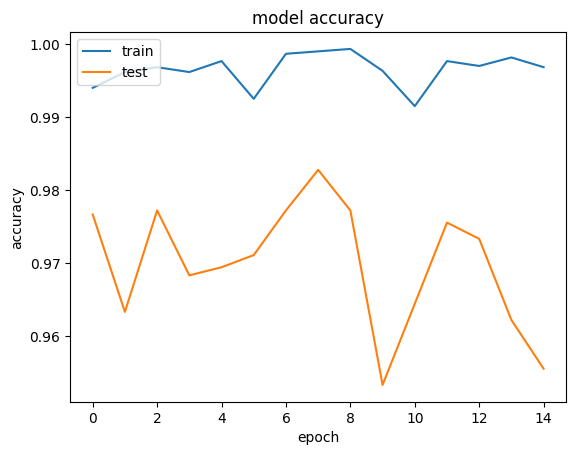

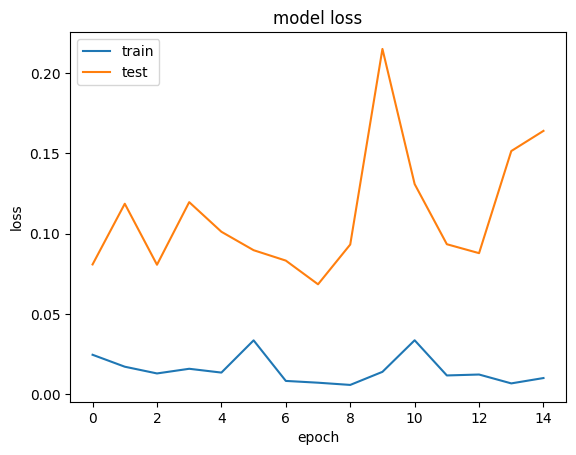

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()